# Name : Ashutosh Chaudhary

# Task 2 : Unsupervised Clustering on Iris Dataset

#### In this task we have to find the optimal number of clusters that are formed on iris dataset using the KMeans clustering

In [2]:
# Importing the various libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [3]:
i = load_iris()

In [6]:
iris = pd.DataFrame(i.data, columns= i.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris.shape

(150, 4)

#### Now checking the optimal number of clusters by visualizing the iris dataset

In [8]:
wcss = []
for i in range(1,10):
    k = KMeans(n_clusters= i)
    model = k.fit(iris)
    wcss.append(k.inertia_)

wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.066035353535376,
 34.29822966507179,
 30.110906071998176,
 28.27454118250173]

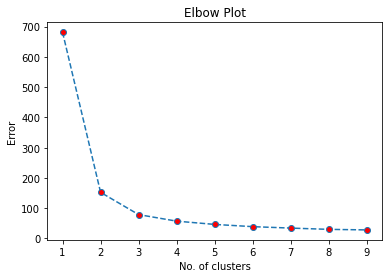

In [9]:
plt.plot(range(1,10), wcss, marker= 'o', markerfacecolor= 'red', linestyle= 'dashed')
plt.xlabel('No. of clusters')
plt.ylabel('Error')
plt.title('Elbow Plot')
plt.show()

#### By looking at the elbow plot and the values of error, we can deduce that the optimal number of clusters for the iris dataset is 3 because after that the difference between the value of errors is significant very less.

In [10]:
k = KMeans(n_clusters= 3)

pred = k.fit(iris).predict(iris)

In [11]:
pr = pd.DataFrame(pred, columns= ['Species'])

In [12]:
pr['Species'].unique()

array([1, 0, 2])

In [13]:
new_iris = pd.concat([iris, pr], axis= 1)
new_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


#### Now lets see the centroids

In [15]:
centroids = pd.DataFrame(k.cluster_centers_, columns= iris.columns)
centroids

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


#### Now lets begin the clustering using the sepal columns of the dataset

In [16]:
c1 = centroids.iloc[:, 0]
c2 = centroids.iloc[:, 1]

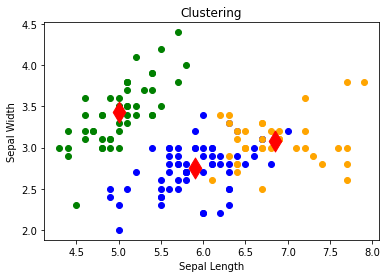

In [17]:
plt.scatter(new_iris[new_iris['Species']== 0]['sepal length (cm)'],
           new_iris[new_iris['Species']== 0]['sepal width (cm)'], c= 'blue', label= 'Virginica')
plt.scatter(new_iris[new_iris['Species']== 1]['sepal length (cm)'],
           new_iris[new_iris['Species']== 1]['sepal width (cm)'], c= 'green', label= 'Setosa')
plt.scatter(new_iris[new_iris['Species']== 2]['sepal length (cm)'],
           new_iris[new_iris['Species']== 2]['sepal width (cm)'], c= 'orange', label= 'Virsicolour')
plt.scatter(c1, c2, marker= 'd', c= 'r', s= 220)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clustering')
plt.show()

#### Now lets begin the clustering using the petal columns of the dataset

In [18]:
c3 = centroids.iloc[:, 2]
c4 = centroids.iloc[:, 3]

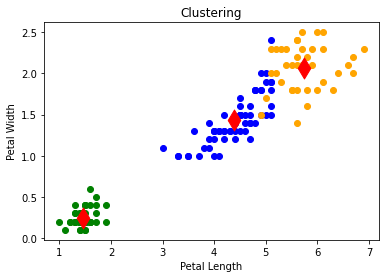

In [19]:
plt.scatter(new_iris[new_iris['Species']== 0]['petal length (cm)'],
           new_iris[new_iris['Species']== 0]['petal width (cm)'], c= 'blue', label= 'Virginica')
plt.scatter(new_iris[new_iris['Species']== 1]['petal length (cm)'],
           new_iris[new_iris['Species']== 1]['petal width (cm)'], c= 'green', label= 'Setosa')
plt.scatter(new_iris[new_iris['Species']== 2]['petal length (cm)'],
           new_iris[new_iris['Species']== 2]['petal width (cm)'], c= 'orange', label= 'Virsicolour')
plt.scatter(c3, c4, marker= 'd', c= 'r', s= 220)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Clustering')
plt.show()

#### Hence the clustering has been the optimal and the task has been completed.